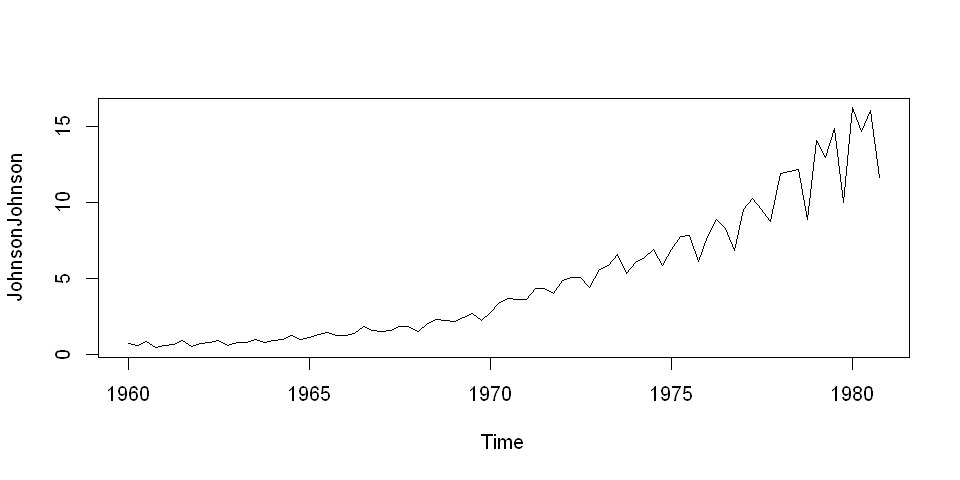

In [1]:
options(repr.plot.width=8, repr.plot.height=4)
plot(JohnsonJohnson)

- Trend observed. Perform differential transform.
- Variation increases over time. Perform log transform.

Log-return transform:
$$ r_t = \log\bigg(\frac{X_t}{X_{t-1}}\bigg) = \log(X_t) - \log(X_{t-1})$$

R code:

```R
diff(log(x_t))
```

In [2]:
jj.log.return <- diff(log(JohnsonJohnson))
jj.log.zero.mean <- jj.log.return - mean(jj.log.return)

In [3]:
ts.data <- jj.log.zero.mean

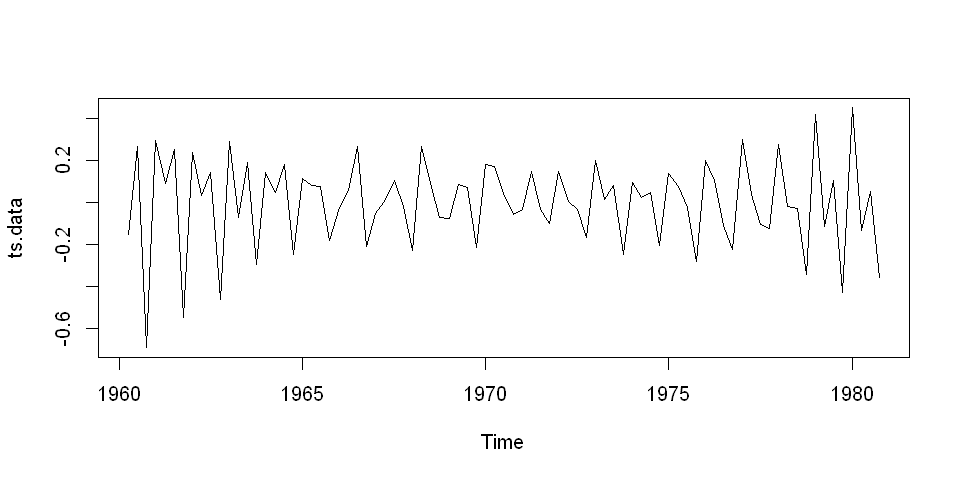

In [4]:
plot(ts.data)

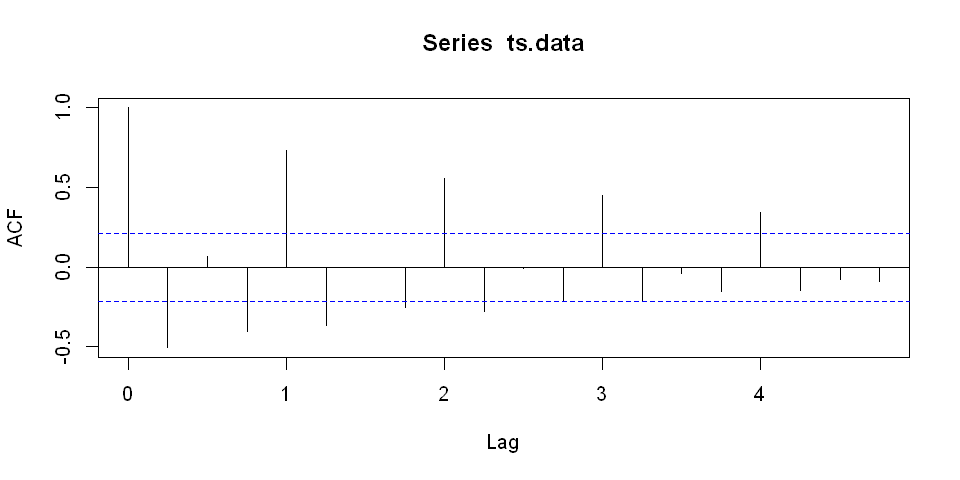

In [5]:
acf(ts.data)

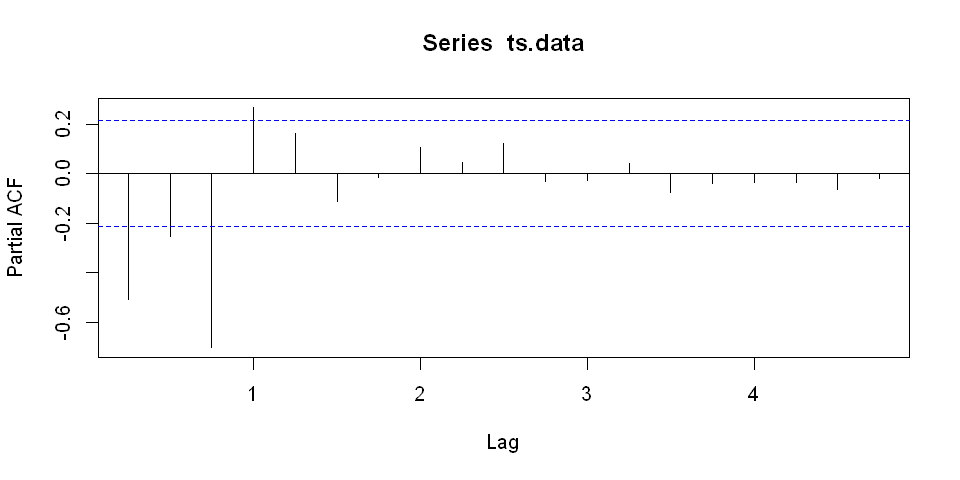

In [6]:
pacf(ts.data)

In [7]:
p <- 4
r <- acf(ts.data, plot=F)$acf[2:(p+1)]
r

[1] -0.50681760  0.06710084 -0.40283604  0.73144780

In [8]:
R <- matrix(1, p, p)
for(i in 1:p) {
    for(j in 1:p) {
        if(i != j) {
            R[i, j] <- r[abs(i - j)]
        }
    }
}
R

1.00000000,-0.50681760,0.06710084,-0.40283604
-0.50681760,1.00000000,-0.50681760,0.06710084
0.06710084,-0.50681760,1.00000000,-0.50681760
-0.40283604,0.06710084,-0.50681760,1.00000000


In [9]:
b <- matrix(r, p, 1)
b

-0.50681760
0.06710084
-0.40283604
0.73144780


In [10]:
phi.hat <- solve(R, b)
phi.hat

-0.6293492
-0.5171526
-0.4883374
0.2651266


In [11]:
c0 <- acf(ts.data, type='covariance', plot=F)$acf[1]
var.hat <- c0*(1 - sum(phi.hat*r))
var.hat

[1] 0.01419242

In [12]:
phi0.hat <- mean(jj.log.return) * (1 - sum(phi.hat))
phi0.hat

[1] 0.079781

In [13]:
cat("Constant:", phi0.hat,"\nCoeffcinets:", phi.hat, "\nVariance:", var.hat)

Constant: 0.079781 
Coeffcinets: -0.6293492 -0.5171526 -0.4883374 0.2651266 
Variance: 0.01419242

Final model:

$$ r_t = 0.079781 - 0.6293492 r_{t-1} - 0.5171526 r_{t-2} - 0.4883374 r_{t-3} + 0.2651266 r_{t-4} + e_t$$

where

$$ e_t \sim N(0, 0.01419242) $$
$$ r_t = \log\bigg(\frac{X_t}{X_{t-1}}\bigg) $$